## Importing Libraries

In [1]:
from common_libraries import *
import project_functions

In [2]:
logger = logging.getLogger("pyspark")
# Filter the NativeCodeLoader warning
logger.addFilter(lambda record: "WARN NativeCodeLoader" not in record.getMessage())  
# Filter the GarbageCollectionMetrics warning
logger.addFilter(lambda record: "WARN GarbageCollectionMetrics" not in record.getMessage())  
# creating a spark session

spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.sql.debug.catalog", False) \
    .config("spark.logLevel", "ERROR") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.executor.memory", "8g") \
    .config("spark.executor.cores", "4") \
    .config("spark.driver.memory", "4g") \
    .config("spark.driver.cores", "2") \
    .getOrCreate()




Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/04/09 19:17:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Ingesting Data

In [3]:
df = spark.read.csv("/Users/pasqualesalomone/Desktop/crime_data.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- DR_NO: integer (nullable = true)
 |-- Date Rptd: string (nullable = true)
 |-- DATE OCC: string (nullable = true)
 |-- TIME OCC: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- AREA NAME: string (nullable = true)
 |-- Rpt Dist No: integer (nullable = true)
 |-- Part 1-2: integer (nullable = true)
 |-- Crm Cd: integer (nullable = true)
 |-- Crm Cd Desc: string (nullable = true)
 |-- Mocodes: string (nullable = true)
 |-- Vict Age: integer (nullable = true)
 |-- Vict Sex: string (nullable = true)
 |-- Vict Descent: string (nullable = true)
 |-- Premis Cd: integer (nullable = true)
 |-- Premis Desc: string (nullable = true)
 |-- Weapon Used Cd: integer (nullable = true)
 |-- Weapon Desc: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Status Desc: string (nullable = true)
 |-- Crm Cd 1: integer (nullable = true)
 |-- Crm Cd 2: integer (nullable = true)
 |-- Crm Cd 3: integer (nullable = true)
 |-- Crm Cd 4: integer (nullable = true)
 |-- L

In [4]:
print("Total numbers of rows is {} and the number of columns is {}".format(df.count(),len(df.columns)))

Total numbers of rows is 925720 and the number of columns is 28


In [5]:
#df.show(1,truncate=False, vertical=True)
df.toPandas().head()


24/04/09 19:17:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


24/04/09 19:18:00 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,None,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,None,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,None,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,None,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,None,34.0944,-118.3277


## EDA (Exploratory Data Analysis)

In [6]:
#df.filter(col('Crm Cd 3').isNull()).count()
project_functions.nulls_buster(df,spark)

,column_name,%null
0,Crm Cd 4,99.993086
1,Crm Cd 3,99.755866
2,Crm Cd 2,92.736789
3,Cross Street,84.312103
4,Weapon Used Cd,65.464611
5,Weapon Desc,65.464611
6,Mocodes,13.985006
7,Vict Descent,13.305103
8,Vict Sex,13.304023
9,Premis Desc,0.060385


In [7]:
project_functions.unique_check(df, "DR_NO",spark)

'Column DR_NO contains unique values'

<Figure size 1200x500 with 0 Axes>

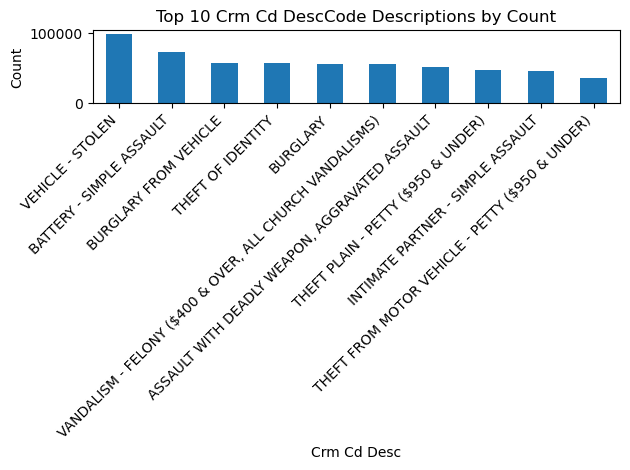

In [8]:
project_functions.plot_top_n_bycolumn(df, "Crm Cd Desc", spark)

In [9]:
#df.groupBy('Crm Cd Desc').agg(count('*').alias('Count')).orderBy('Count', ascending=False).limit(10).show()


<Figure size 1200x500 with 0 Axes>

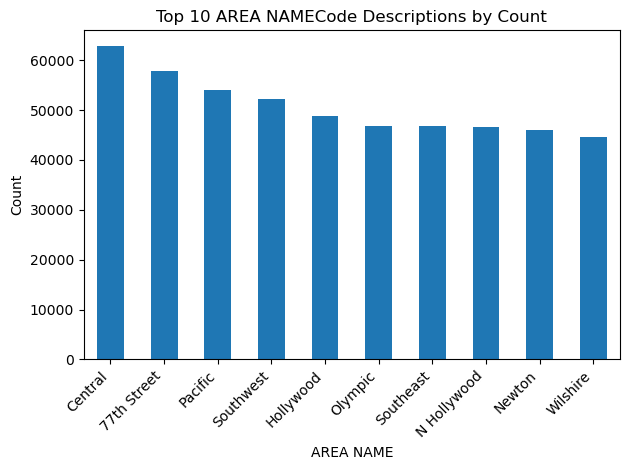

In [10]:
project_functions.plot_top_n_bycolumn(df, "AREA NAME", spark)

In [11]:
df.select('Date Rptd','TIME OCC').describe().show()

+-------+--------------------+------------------+
|summary|           Date Rptd|          TIME OCC|
+-------+--------------------+------------------+
|  count|              925720|            925720|
|   mean|                null|1337.4902087024154|
| stddev|                null| 652.6937534056576|
|    min|01/01/2020 12:00:...|                 1|
|    max|12/31/2023 12:00:...|              2359|
+-------+--------------------+------------------+



## Way forward

- Can we predict the type of crime?

- Are some locations truly more dangerous than others?
